In [1]:
import numpy as np
import pandas as pd
import acquire
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Iris

- Use the function defined in acquire.py to load the iris data.

- Drop the species_id and measurement_id columns.

- Rename the species_name column to just species.

- Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

- Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applie

In [2]:
iris = acquire.get_iris_data()
iris.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,1,setosa
1,2,4.9,3.0,1.4,0.2,1,1,setosa
2,3,4.7,3.2,1.3,0.2,1,1,setosa
3,4,4.6,3.1,1.5,0.2,1,1,setosa
4,5,5.0,3.6,1.4,0.2,1,1,setosa


In [3]:
# Drop the species_id and measurement_id columns.
iris = iris.drop(columns="species_id")

In [4]:
# Rename the species_name column to just species.
iris = iris.rename(columns={"species_name":"species"})
iris

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [5]:
# Create dummy variables of the species name and concatenate onto the iris dataframe.
pd.concat([iris,pd.get_dummies(iris.species)], axis=1)


,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,1,5.1,3.5,1.4,0.2,setosa,1,0,0
1,2,4.9,3.0,1.4,0.2,setosa,1,0,0
2,3,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5,5.0,3.6,1.4,0.2,setosa,1,0,0
...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica,0,0,1
146,147,6.3,2.5,5.0,1.9,virginica,0,0,1
147,148,6.5,3.0,5.2,2.0,virginica,0,0,1
148,149,6.2,3.4,5.4,2.3,virginica,0,0,1


In [6]:
# Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

def prep_iris():
    iris = acquire.get_iris_data()
    
    # Drop the species_id and measurement_id columns.
    iris = iris.drop(columns="species_id")
    
    # Rename the species_name column to just species.
    iris = iris.rename(columns={"species_name":"species"})
    
    # Create dummy variables of the species name and concatenate onto the iris dataframe.
    return pd.concat([iris,pd.get_dummies(iris.species)], axis=1)
    

In [7]:
prep_iris().head()
final_iris= prep_iris()

# Titanic

- Use the function defined in acquire.py to load the Titanic data.

- Drop any unnecessary, unhelpful, or duplicated columns.

- Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

- Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [8]:
titanic = acquire.get_titanic_data()
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [10]:
print(titanic.pclass.value_counts())
print(titanic["class"].value_counts())

3    491
1    216
2    184
Name: pclass, dtype: int64
Third     491
First     216
Second    184
Name: class, dtype: int64


In [11]:
pd.crosstab(titanic.pclass,titanic["class"])

class,First,Second,Third
pclass,,,
1,216,0,0
2,0,184,0
3,0,0,491


Drop `titanic.class` beacuse it duplicate

In [12]:
# check for duplicates in passenger_id
titanic.passenger_id.duplicated().sum()

0

In [13]:
# get only numeric columns
num_cols = titanic.select_dtypes(["number"])
num_cols.head(2)

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone
0,0,0,3,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,0


survived
0    549
1    342
Name: survived, dtype: int64
0    0.616162
1    0.383838
Name: survived, dtype: float64


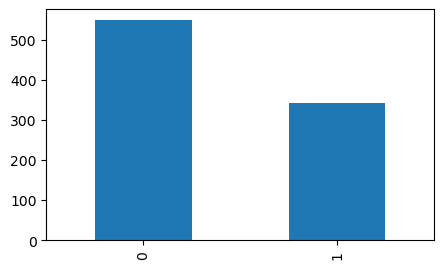


pclass
3    491
1    216
2    184
Name: pclass, dtype: int64
3    0.551066
1    0.242424
2    0.206510
Name: pclass, dtype: float64


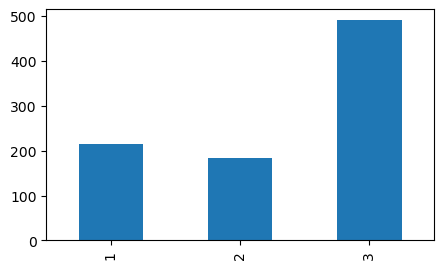


age
NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: age, Length: 89, dtype: int64
24.00    0.042017
22.00    0.037815
18.00    0.036415
19.00    0.035014
28.00    0.035014
           ...   
36.50    0.001401
55.50    0.001401
0.92     0.001401
23.50    0.001401
74.00    0.001401
Name: age, Length: 88, dtype: float64


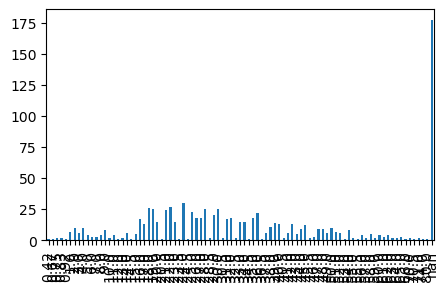


sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: sibsp, dtype: float64


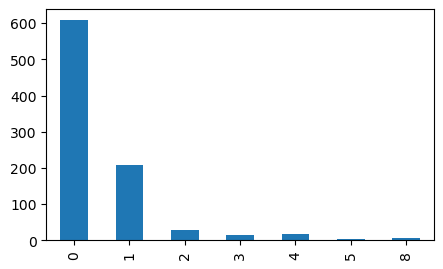


parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64
0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: parch, dtype: float64


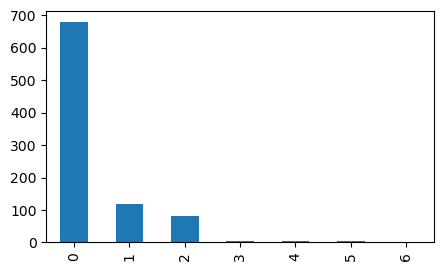


fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64
8.0500     0.048260
13.0000    0.047138
7.8958     0.042649
7.7500     0.038159
26.0000    0.034792
             ...   
35.0000    0.001122
28.5000    0.001122
6.2375     0.001122
14.0000    0.001122
10.5167    0.001122
Name: fare, Length: 248, dtype: float64


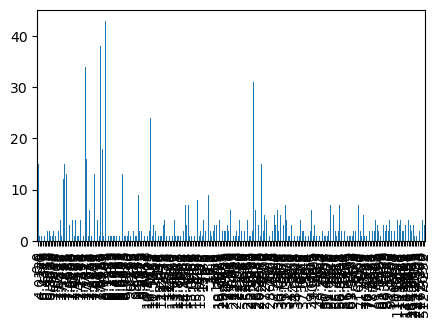


alone
1    537
0    354
Name: alone, dtype: int64
1    0.602694
0    0.397306
Name: alone, dtype: float64


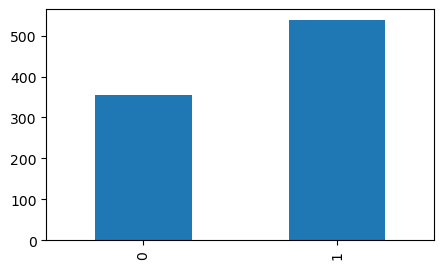

In [14]:
# view all columns values
cols = num_cols.columns

for ele in cols[1:]:
    plt.figure(figsize=(5,3))
    print(ele)
    print(titanic[ele].value_counts(dropna=False))
    print(titanic[ele].value_counts(normalize=True))
    titanic[ele].value_counts(dropna=False).sort_index().plot.bar()
    plt.show()
    print()

In [15]:
obj_cols = titanic.select_dtypes("object")

sex
male      577
female    314
Name: sex, dtype: int64
male      0.647587
female    0.352413
Name: sex, dtype: float64


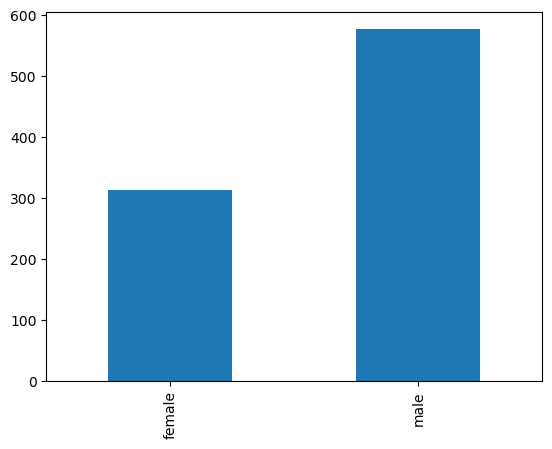


embarked
S       644
C       168
Q        77
None      2
Name: embarked, dtype: int64
S    0.724409
C    0.188976
Q    0.086614
Name: embarked, dtype: float64


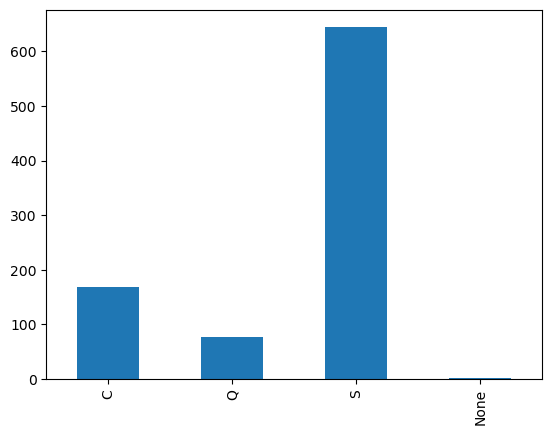


class
Third     491
First     216
Second    184
Name: class, dtype: int64
Third     0.551066
First     0.242424
Second    0.206510
Name: class, dtype: float64


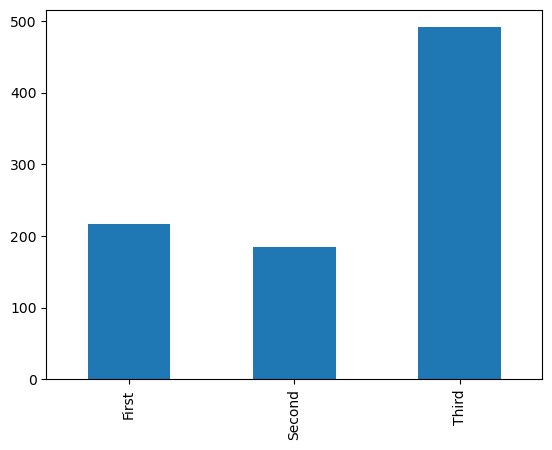


deck
None    688
C        59
B        47
D        33
E        32
A        15
F        13
G         4
Name: deck, dtype: int64
C    0.290640
B    0.231527
D    0.162562
E    0.157635
A    0.073892
F    0.064039
G    0.019704
Name: deck, dtype: float64


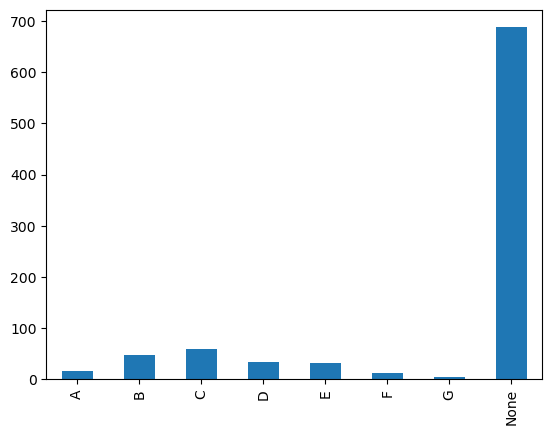


embark_town
Southampton    644
Cherbourg      168
Queenstown      77
None             2
Name: embark_town, dtype: int64
Southampton    0.724409
Cherbourg      0.188976
Queenstown     0.086614
Name: embark_town, dtype: float64


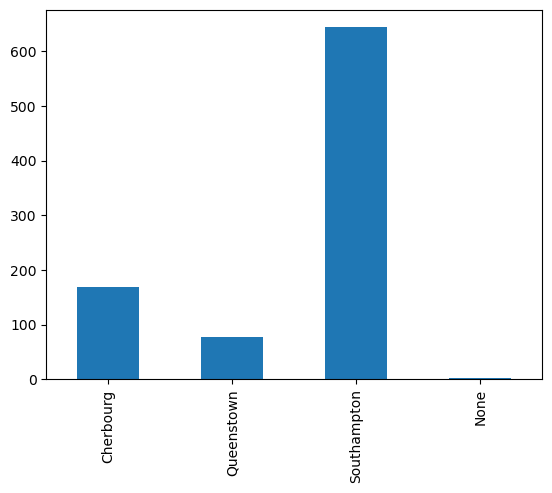

In [16]:
#plot distributions of string columns
for col in obj_cols:
    print(col)
    print(titanic[col].value_counts(dropna=False))
    print(titanic[col].value_counts(normalize=True)) #percentage
    titanic[col].value_counts(dropna=False).sort_index().plot.bar()
    plt.show()
    print()

Drop any unnecessary, unhelpful, or duplicated columns.

In [17]:
# drop duplicates and un necessery columns
drop_cols = ["class", "deck", "embark_town"]

titanic = titanic.drop(columns=drop_cols, axis=1)


Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [18]:
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,1,female,38.0,1,0,71.2833,C,0
2,2,1,3,female,26.0,0,0,7.9250,S,1
3,3,1,1,female,35.0,1,0,53.1000,S,0
4,4,0,3,male,35.0,0,0,8.0500,S,1


In [19]:
all_dummies = pd.get_dummies(titanic[["sex"]], drop_first=True)
all_dummies.head()

,sex_male
0,1
1,0
2,0
3,0
4,1


In [20]:
def prep_titanic(df):
    '''
    This function will clean the the titanic dataset
    '''
    df = df.drop(columns =['embark_town','class','age','deck'])

    df.embarked = df.embarked.fillna(value='S')
    
    # Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.
    dummy_df = pd.get_dummies(df[['sex','embarked']], drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    return df

In [21]:
origin_titanic = acquire.get_titanic_data()
final_titanic = prep_titanic(origin_titanic)
final_titanic.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,1,0,7.2500,S,0,1,0,1
1,1,1,1,female,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,0,0,7.9250,S,1,0,0,1
3,3,1,1,female,1,0,53.1000,S,0,0,0,1
4,4,0,3,male,0,0,8.0500,S,1,1,0,1


# Telco

- Use the function defined in acquire.py to load the Telco data.

- Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

- Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

- Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [22]:
telco = acquire.get_telco()
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [23]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [24]:
telco_num_cols = telco.select_dtypes("number").columns
telco_num_cols

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'senior_citizen', 'tenure', 'monthly_charges'],
      dtype='object')

payment_type_id
1    2365
2    1612
3    1544
4    1522
Name: payment_type_id, dtype: int64
1    0.335794
2    0.228880
3    0.219225
4    0.216101
Name: payment_type_id, dtype: float64


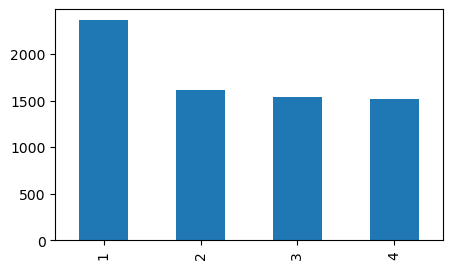




internet_service_type_id
2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64
2    0.439585
1    0.343746
3    0.216669
Name: internet_service_type_id, dtype: float64


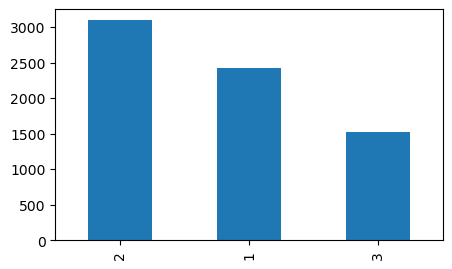




contract_type_id
1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64
1    0.550192
3    0.240664
2    0.209144
Name: contract_type_id, dtype: float64


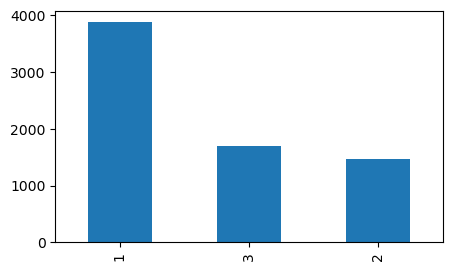




senior_citizen
0    5901
1    1142
Name: senior_citizen, dtype: int64
0    0.837853
1    0.162147
Name: senior_citizen, dtype: float64


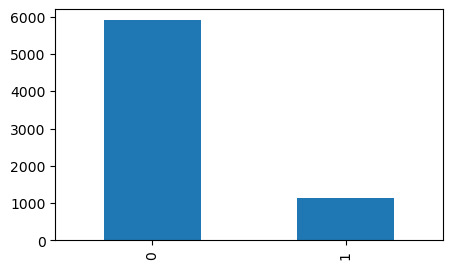




tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
1     0.087037
72    0.051399
2     0.033792
3     0.028397
4     0.024989
        ...   
28    0.008093
39    0.007951
44    0.007241
36    0.007099
0     0.001562
Name: tenure, Length: 73, dtype: float64


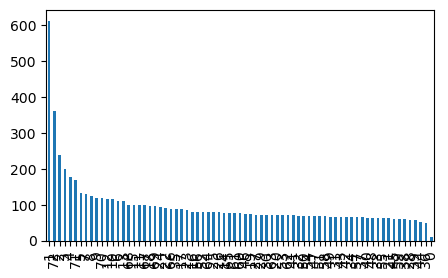




monthly_charges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
116.55     1
106.85     1
68.55      1
108.80     1
67.85      1
Name: monthly_charges, Length: 1585, dtype: int64
20.05     0.008661
19.85     0.006389
19.95     0.006247
19.90     0.006247
20.00     0.006105
            ...   
116.55    0.000142
106.85    0.000142
68.55     0.000142
108.80    0.000142
67.85     0.000142
Name: monthly_charges, Length: 1585, dtype: float64


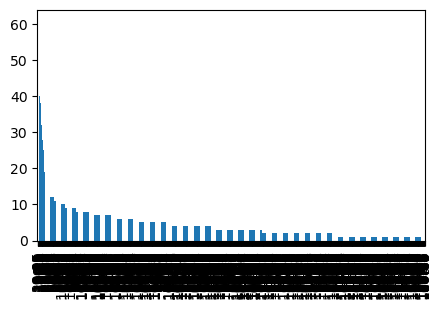

In [25]:
for i in telco_num_cols:
    plt.figure(figsize=(5,3))
    print(i)
    print(telco[i].value_counts(dropna=False))
    print(telco[i].value_counts(normalize=True))
    telco[i].value_counts( dropna=False).plot.bar()
    plt.show()
    print("\n\n")

In [26]:
telco_obj_cols = telco.select_dtypes("object").columns
telco_obj_cols

Index(['customer_id', 'gender', 'partner', 'dependents', 'phone_service',
       'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'total_charges', 'churn', 'contract_type',
       'internet_service_type', 'payment_type'],
      dtype='object')

customer_id
0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: customer_id, Length: 7043, dtype: int64
0002-ORFBO    0.000142
6616-AALSR    0.000142
6625-UTXEW    0.000142
6625-IUTTT    0.000142
6625-FLENO    0.000142
                ...   
3352-RICWQ    0.000142
3352-ALMCK    0.000142
3351-NQLDI    0.000142
3351-NGXYI    0.000142
9995-HOTOH    0.000142
Name: customer_id, Length: 7043, dtype: float64


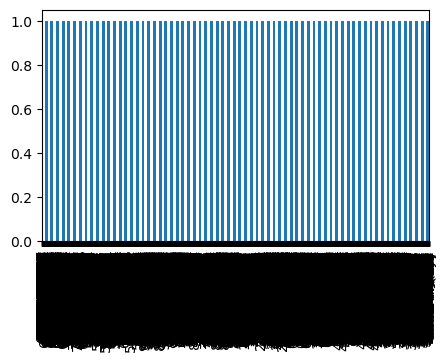




gender
Male      3555
Female    3488
Name: gender, dtype: int64
Male      0.504756
Female    0.495244
Name: gender, dtype: float64


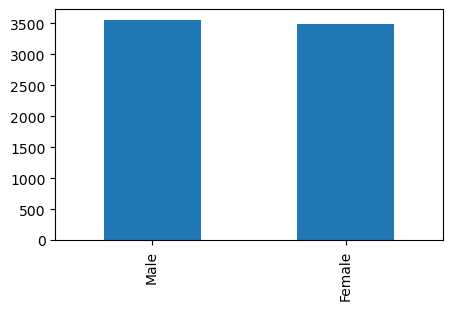




partner
No     3641
Yes    3402
Name: partner, dtype: int64
No     0.516967
Yes    0.483033
Name: partner, dtype: float64


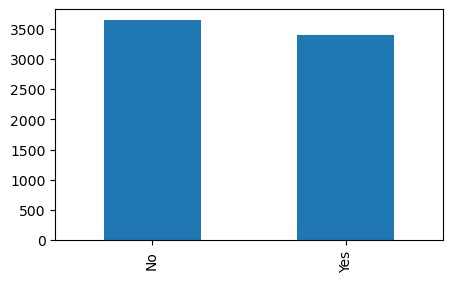




dependents
No     4933
Yes    2110
Name: dependents, dtype: int64
No     0.700412
Yes    0.299588
Name: dependents, dtype: float64


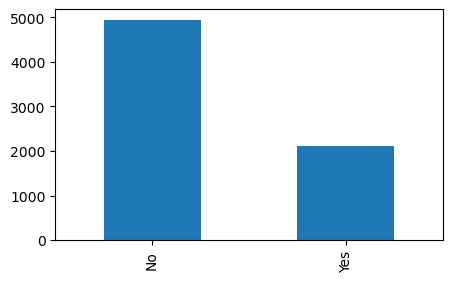




phone_service
Yes    6361
No      682
Name: phone_service, dtype: int64
Yes    0.903166
No     0.096834
Name: phone_service, dtype: float64


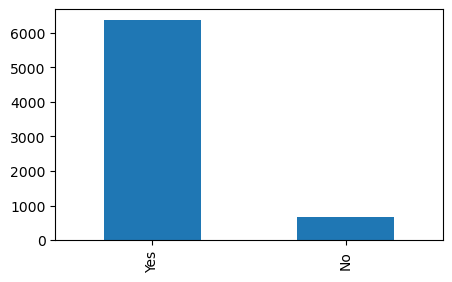




multiple_lines
No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: multiple_lines, dtype: float64


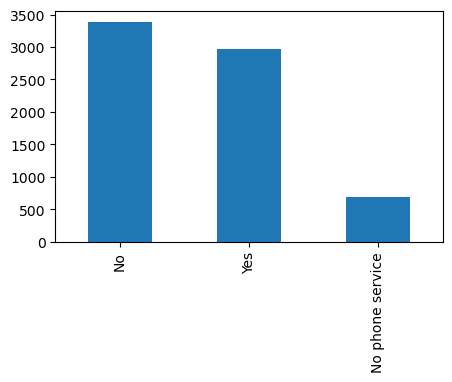




online_security
No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64
No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: online_security, dtype: float64


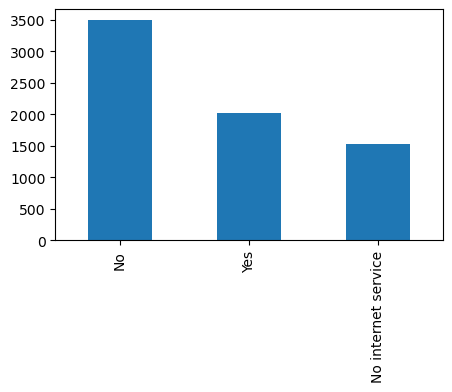




online_backup
No                     3088
Yes                    2429
No internet service    1526
Name: online_backup, dtype: int64
No                     0.438450
Yes                    0.344881
No internet service    0.216669
Name: online_backup, dtype: float64


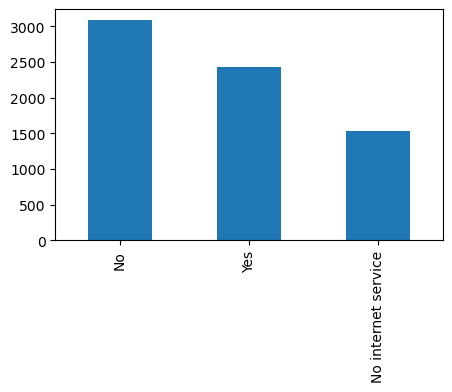




device_protection
No                     3095
Yes                    2422
No internet service    1526
Name: device_protection, dtype: int64
No                     0.439443
Yes                    0.343888
No internet service    0.216669
Name: device_protection, dtype: float64


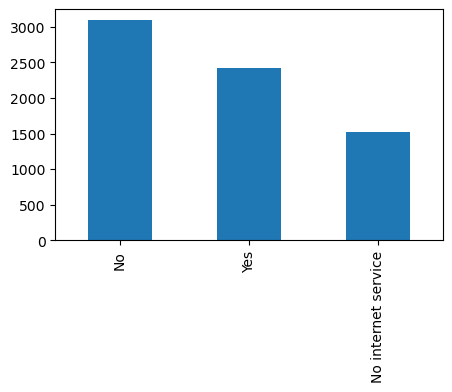




tech_support
No                     3473
Yes                    2044
No internet service    1526
Name: tech_support, dtype: int64
No                     0.493114
Yes                    0.290217
No internet service    0.216669
Name: tech_support, dtype: float64


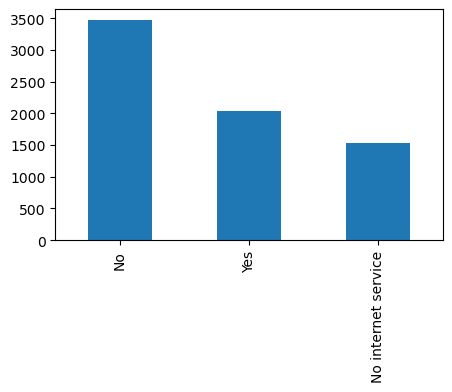




streaming_tv
No                     2810
Yes                    2707
No internet service    1526
Name: streaming_tv, dtype: int64
No                     0.398978
Yes                    0.384353
No internet service    0.216669
Name: streaming_tv, dtype: float64


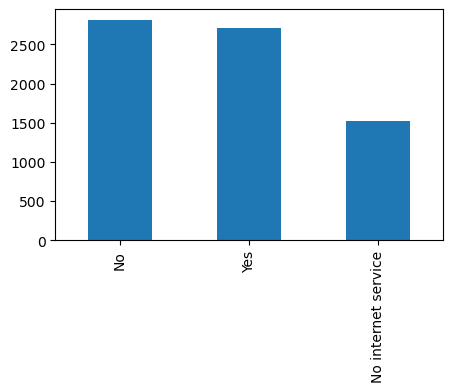




streaming_movies
No                     2785
Yes                    2732
No internet service    1526
Name: streaming_movies, dtype: int64
No                     0.395428
Yes                    0.387903
No internet service    0.216669
Name: streaming_movies, dtype: float64


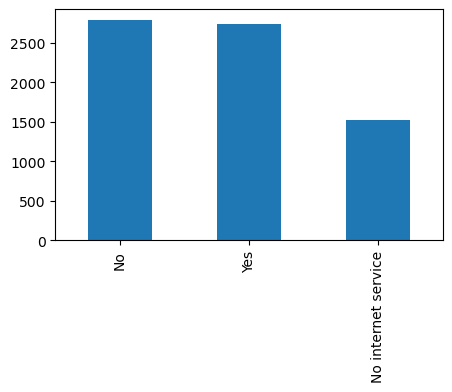




paperless_billing
Yes    4171
No     2872
Name: paperless_billing, dtype: int64
Yes    0.592219
No     0.407781
Name: paperless_billing, dtype: float64


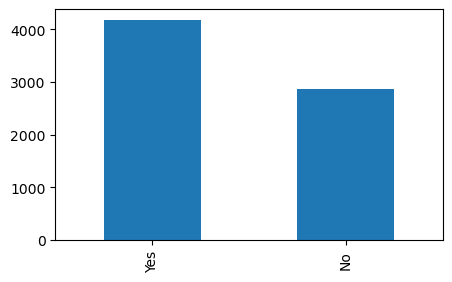




total_charges
           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: total_charges, Length: 6531, dtype: int64
           0.001562
20.2       0.001562
19.75      0.001278
19.9       0.001136
20.05      0.001136
             ...   
2387.75    0.000142
6302.8     0.000142
2058.5     0.000142
829.55     0.000142
3707.6     0.000142
Name: total_charges, Length: 6531, dtype: float64


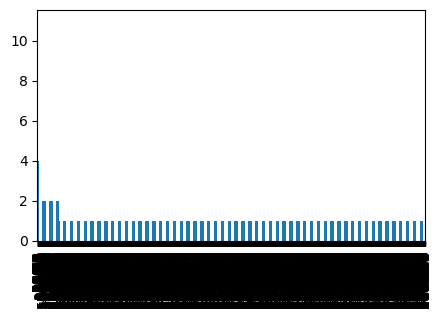




churn
No     5174
Yes    1869
Name: churn, dtype: int64
No     0.73463
Yes    0.26537
Name: churn, dtype: float64


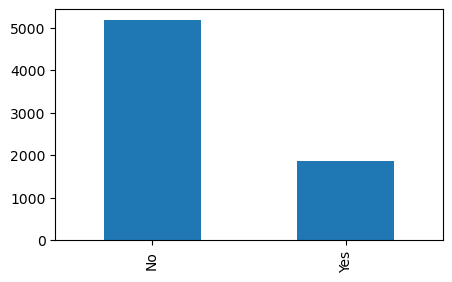




contract_type
Month-to-month    3875
Two year          1695
One year          1473
Name: contract_type, dtype: int64
Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: contract_type, dtype: float64


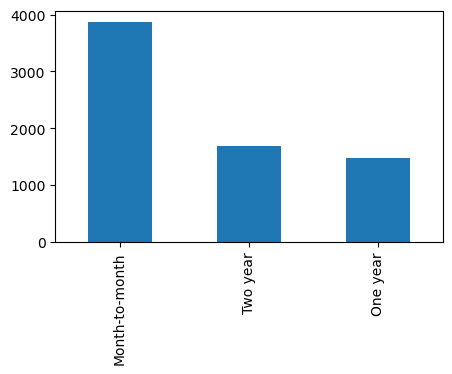




internet_service_type
Fiber optic    3096
DSL            2421
None           1526
Name: internet_service_type, dtype: int64
Fiber optic    0.439585
DSL            0.343746
None           0.216669
Name: internet_service_type, dtype: float64


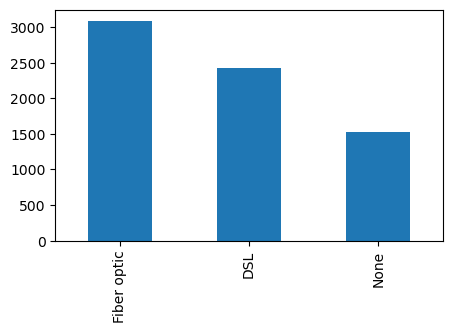




payment_type
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_type, dtype: int64
Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: payment_type, dtype: float64


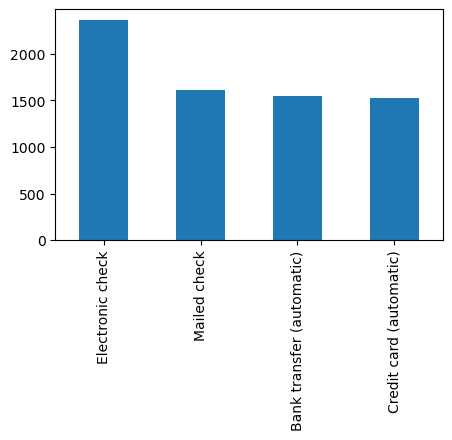

In [27]:
for i in telco_obj_cols:
    plt.figure(figsize=(5,3))
    print(i)
    print(telco[i].value_counts(dropna=False))
    print(telco[i].value_counts(normalize=True))
    telco[i].value_counts( dropna=False).plot.bar()
    plt.show()
    print("\n\n")

In [28]:
# drop duplicates and un necessery columns
drop_cols = ["customer_id"]

telco = telco.drop(columns=drop_cols, axis=1)
telco

,payment_type_id,internet_service_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,Female,0,Yes,Yes,9,Yes,No,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,2,1,1,Male,0,No,No,9,Yes,Yes,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,Male,0,No,No,4,Yes,No,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,Male,1,Yes,No,13,Yes,No,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,Female,1,Yes,No,3,Yes,No,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,Female,0,No,No,13,Yes,No,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,1,2,1,Male,0,Yes,No,22,Yes,Yes,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,2,1,1,Male,0,No,No,2,Yes,No,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,2,1,3,Male,0,Yes,Yes,67,Yes,No,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [29]:
dummy_cols = ["gender","phone_service", "tech_support", "streaming_tv","streaming_movies","paperless_billing","contract_type", "internet_service_type", "churn", "payment_type"]

all_dummies = pd.get_dummies(telco[dummy_cols], drop_first=True)
all_dummies.head()

,gender_Male,phone_service_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,churn_Yes,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1
1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0
3,1,1,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0
4,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1


In [30]:
def prep_telco(telco):
    # drop columns
    drop_cols = ["customer_id"]
    telco = telco.drop(columns=drop_cols, axis=1)
    
    # create dummy variables
    dummy_cols = ["gender","phone_service", "tech_support", "streaming_tv","streaming_movies","paperless_billing","contract_type", "internet_service_type", "churn", "payment_type"]
    all_dummies = pd.get_dummies(telco[dummy_cols], drop_first=True)
    
    telco = pd.concat([telco, all_dummies], axis=1)
    return telco
    

In [31]:
origin_telco= telco = acquire.get_telco()

final_telco = prep_telco(origin_telco)
final_telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,churn_Yes,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,2,1,2,Female,0,Yes,Yes,9,Yes,No,...,0,1,1,0,0,0,0,0,0,1
1,2,1,1,Male,0,No,No,9,Yes,Yes,...,1,0,0,0,0,0,0,0,0,1
2,1,2,1,Male,0,No,No,4,Yes,No,...,0,1,0,0,1,0,1,0,1,0
3,1,2,1,Male,1,Yes,No,13,Yes,No,...,1,1,0,0,1,0,1,0,1,0
4,2,2,1,Female,1,Yes,No,3,Yes,No,...,0,1,0,0,1,0,1,0,0,1


# Split data

- Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.

- Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.

- Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.

- Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [32]:
def train_val_test_split(df, target_col):
    """
    Takes in the titanic dataframe and return train, validate, test subset dataframes
    """
    #first split
    train_val, test = train_test_split(df, #dataframe
                    random_state= 95, #setting my random seed
                    test_size= 0.20, #setting the size of my test df
                     stratify=df[target_col]) #stratifying on my target variable
    # second split
    train,validate = train_test_split(train_val,
                                     random_state=90,
                                      test_size=0.25,
                                      stratify=train_val[target_col])
    return train, validate, test

train, validate, test = train_val_test_split(final_telco, "churn")
len(train),len(validate), len(test)
                                   

(4225, 1409, 1409)

## telco

In [33]:
train, validate, test = train_val_test_split(final_telco, "churn")

train.head(3)

,payment_type_id,internet_service_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,churn_Yes,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
6359,4,2,2,Female,1,Yes,No,72,Yes,Yes,...,1,1,1,0,1,0,0,1,0,0
661,2,2,1,Female,0,No,No,1,Yes,No,...,0,1,0,0,1,0,1,0,0,1
1343,1,2,2,Female,0,No,No,58,Yes,Yes,...,1,1,1,0,1,0,0,0,1,0


In [34]:
validate.head(3)

,payment_type_id,internet_service_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,churn_Yes,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5767,2,1,2,Male,0,No,No,17,Yes,No,...,0,0,1,0,0,0,0,0,0,1
4572,3,2,3,Male,0,Yes,Yes,68,Yes,Yes,...,1,1,0,1,1,0,0,0,0,0
2539,1,1,2,Female,0,Yes,No,13,Yes,No,...,0,0,1,0,0,0,0,0,1,0


In [35]:
test.head(3)

,payment_type_id,internet_service_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,churn_Yes,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
1846,3,1,2,Female,0,No,No,8,Yes,No,...,0,0,1,0,0,0,0,0,0,0
6339,2,1,1,Female,0,Yes,Yes,4,Yes,No,...,0,0,0,0,0,0,1,0,0,1
4254,1,2,1,Male,1,Yes,No,23,Yes,Yes,...,1,1,0,0,1,0,0,0,1,0


## Titanic

In [38]:
train, validate, test = train_val_test_split(final_titanic, "survived")

In [39]:
train.head(3)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
202,202,0,3,male,0,0,6.4958,S,1,1,0,1
689,689,1,1,female,0,1,211.3375,S,0,0,0,1
343,343,0,2,male,0,0,13.0000,S,1,1,0,1


In [40]:
validate.head(3)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
524,524,0,3,male,0,0,7.2292,C,1,1,0,0
431,431,1,3,female,1,0,16.1000,S,0,0,0,1
216,216,1,3,female,0,0,7.9250,S,1,0,0,1


In [41]:
test.head(3)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
791,791,0,2,male,0,0,26.0000,S,1,1,0,1
189,189,0,3,male,0,0,7.8958,S,1,1,0,1
530,530,1,2,female,1,1,26.0000,S,0,0,0,1


## iris

In [42]:
train, validate, test = train_val_test_split(final_iris,"species")

In [43]:
train.head(3)

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
134,135,6.1,2.6,5.6,1.4,virginica,0,0,1
70,71,5.9,3.2,4.8,1.8,versicolor,0,1,0
106,107,4.9,2.5,4.5,1.7,virginica,0,0,1


In [44]:
validate.head(3)

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
140,141,6.7,3.1,5.6,2.4,virginica,0,0,1
88,89,5.6,3.0,4.1,1.3,versicolor,0,1,0
51,52,6.4,3.2,4.5,1.5,versicolor,0,1,0


In [45]:
test.head(3)

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
130,131,7.4,2.8,6.1,1.9,virginica,0,0,1
146,147,6.3,2.5,5.0,1.9,virginica,0,0,1
98,99,5.1,2.5,3.0,1.1,versicolor,0,1,0
